## Book Title Prediction

In [21]:
# Pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt 

#tensorflow
import tensorflow as tf
from tensorflow import keras

#Opencv
import cv2

#numpy
import numpy as np

## **Data Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(        
            rotation_range=45,
            width_shift_range=0.2,  
            height_shift_range=0.2,    
            shear_range=0.2,        
            zoom_range=0.2,        
            horizontal_flip=True,
            vertical_flip=True,  
            fill_mode='constant', cval=125)
for j in os.listdir('2'): # Folder name for book 2 similar to all folders
   i = 0
   x = io.imread("2/"+j)
   x = x.reshape((1, ) + x.shape)
   for batch in datagen.flow(x, batch_size=16,
                           save_to_dir='augmented/2', # Folder for saved augmented data to respective book(Saved each book data into separte folder)
                           save_prefix='aug',
                           save_format='jpg'):    
      i += 1    
      if i > 100:        
         break

## **Create path for Book Images**

In [2]:
from pathlib import Path
my_path = Path(r'\TextDetection\augmented')

## **Create windows path for each folder of images.**

In [3]:
book_images_dict = {
    'SII': list(my_path.glob('0/*')),
    'SR': list(my_path.glob('1/*')),
    'MGTE': list(my_path.glob('2/*'))
}
book_labels_dict = {
    'SII': 0,
    'SR': 1,
    'MGTE': 2
}

## **Split data into independent(X) and dependent variable.**

In [4]:
X = []
y = []

for book_name,images in book_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize = cv2.resize(img,(150,150))
        X.append(resize)
        y.append(book_labels_dict[book_name])


## **Show some images**

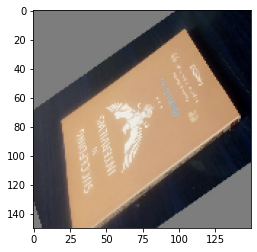

In [27]:
plt.imshow(X[0]);

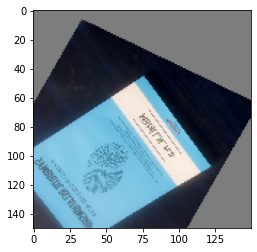

In [32]:
plt.imshow(X[300]);

## **Convert into numpy array**

In [5]:
X = np.array(X)
y = np.array(y)

## **Split data into training data and testing data(Validation data).**

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=43)

## **Scaled all records between 0 to 1**

In [7]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /  255

## **Model Creation**

In [8]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),
                  activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
26/26 [==============================] - 9s 40ms/step - loss: 298.2309 - accuracy: 0.6007
Epoch 2/10
26/26 [==============================] - 1s 23ms/step - loss: 0.0558 - accuracy: 0.9840
Epoch 3/10
26/26 [==============================] - 1s 23ms/step - loss: 0.0059 - accuracy: 0.9975
Epoch 4/10
26/26 [==============================] - 1s 23ms/step - loss: 1.3298e-04 - accuracy: 1.0000
Epoch 5/10
26/26 [==============================] - 1s 24ms/step - loss: 8.6397e-05 - accuracy: 1.0000
Epoch 6/10
26/26 [==============================] - 1s 23ms/step - loss: 0.0323 - accuracy: 0.9926
Epoch 7/10
26/26 [==============================] - 1s 24ms/step - loss: 0.7994 - accuracy: 0.8157
Epoch 8/10
26/26 [==============================] - 1s 25ms/step - loss: 0.2024 - accuracy: 0.9287
Epoch 9/10
26/26 [==============================] - 1s 24ms/step - loss: 0.1185 - accuracy: 0.9484
Epoch 10/10
26/26 [==============================] - 1s 24ms/step - loss: 0.0299 - accuracy: 0.9939

## **Save model** 

In [15]:
model.save("book")